In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import warnings # For handling error messages.
# Don't worry about the following two instructions: they just suppress warnings that could occur later. 
warnings.filterwarnings('ignore')
warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
books = pd.read_csv("books.csv", error_bad_lines = False)

Skipping line 3350: expected 12 fields, saw 13
Skipping line 4704: expected 12 fields, saw 13
Skipping line 5879: expected 12 fields, saw 13
Skipping line 8981: expected 12 fields, saw 13



In [3]:
books.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [4]:
books.isnull().sum()
#has no missing data

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [5]:
books.shape

(11123, 12)

In [6]:
books.duplicated().sum()

0

In [7]:
books.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


### Rating counts and text_review_count have very high max value. 
### Minimum value for number pages is 0. 
### Sincea book cant have 0 pages it can be an error. 
### Maximum num_page is also very high, its unlikely to have a book with 6576 pages. It could be outlier

In [8]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


<Axes: title={'center': 'Number of book written by author'}, xlabel='authors', ylabel='count'>

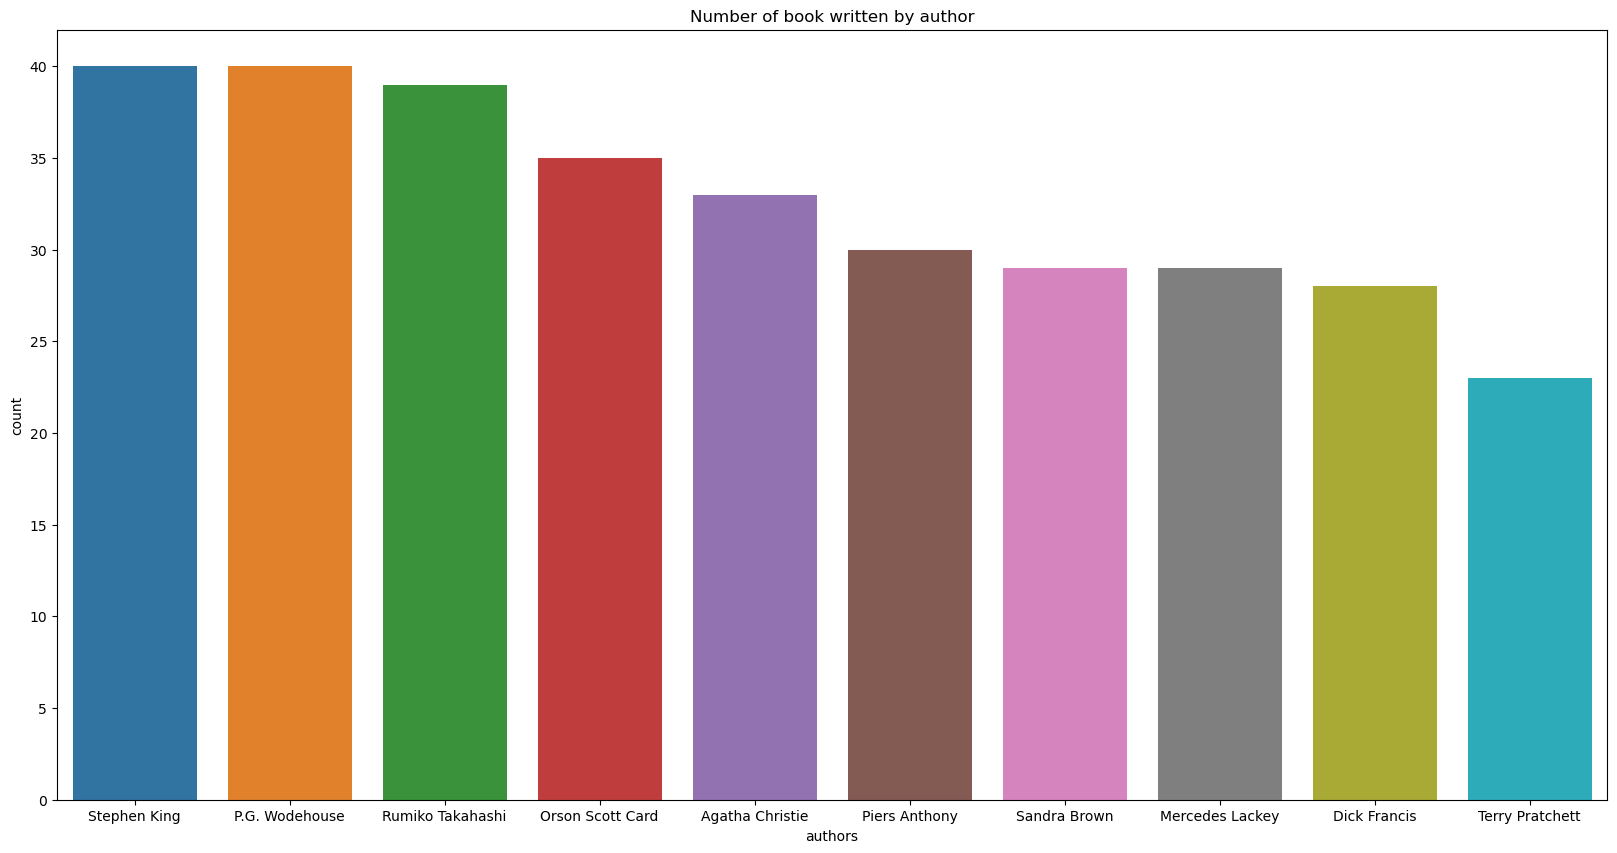

In [9]:
#ploting top10 author by number of books written
plt.figure(1, figsize = (20,10))
plt.title("Number of book written by author")
sns.countplot(x="authors", order=books["authors"].value_counts().index[0:10],data= books)


In [10]:
books[books["authors"] == "Stephen King"].value_counts().sum()

40

In [11]:
books[books["authors"] == "P.G. Wodehouse"].value_counts().sum()
#Stephen king and P.G. wodehouse has same amount of books written

40

<Axes: title={'center': 'Most occuring language'}, xlabel='language_code', ylabel='count'>

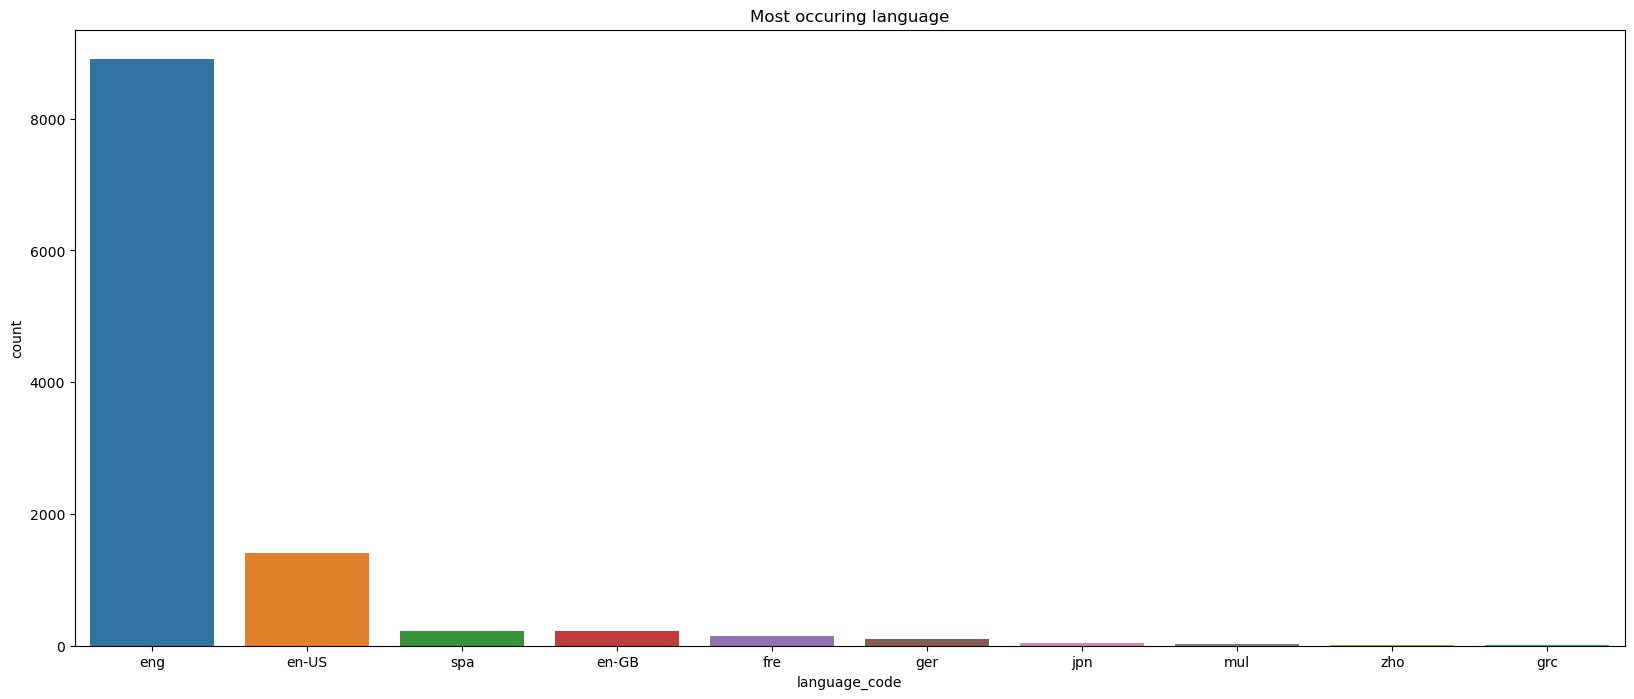

In [12]:
#plotting most occuring language
plt.figure(1, figsize = (20,8))
plt.title("Most occuring language")
sns.countplot(x="language_code", order = books["language_code"].value_counts().index[0:10],data=books)

<Axes: xlabel='ratings_count', ylabel='title'>

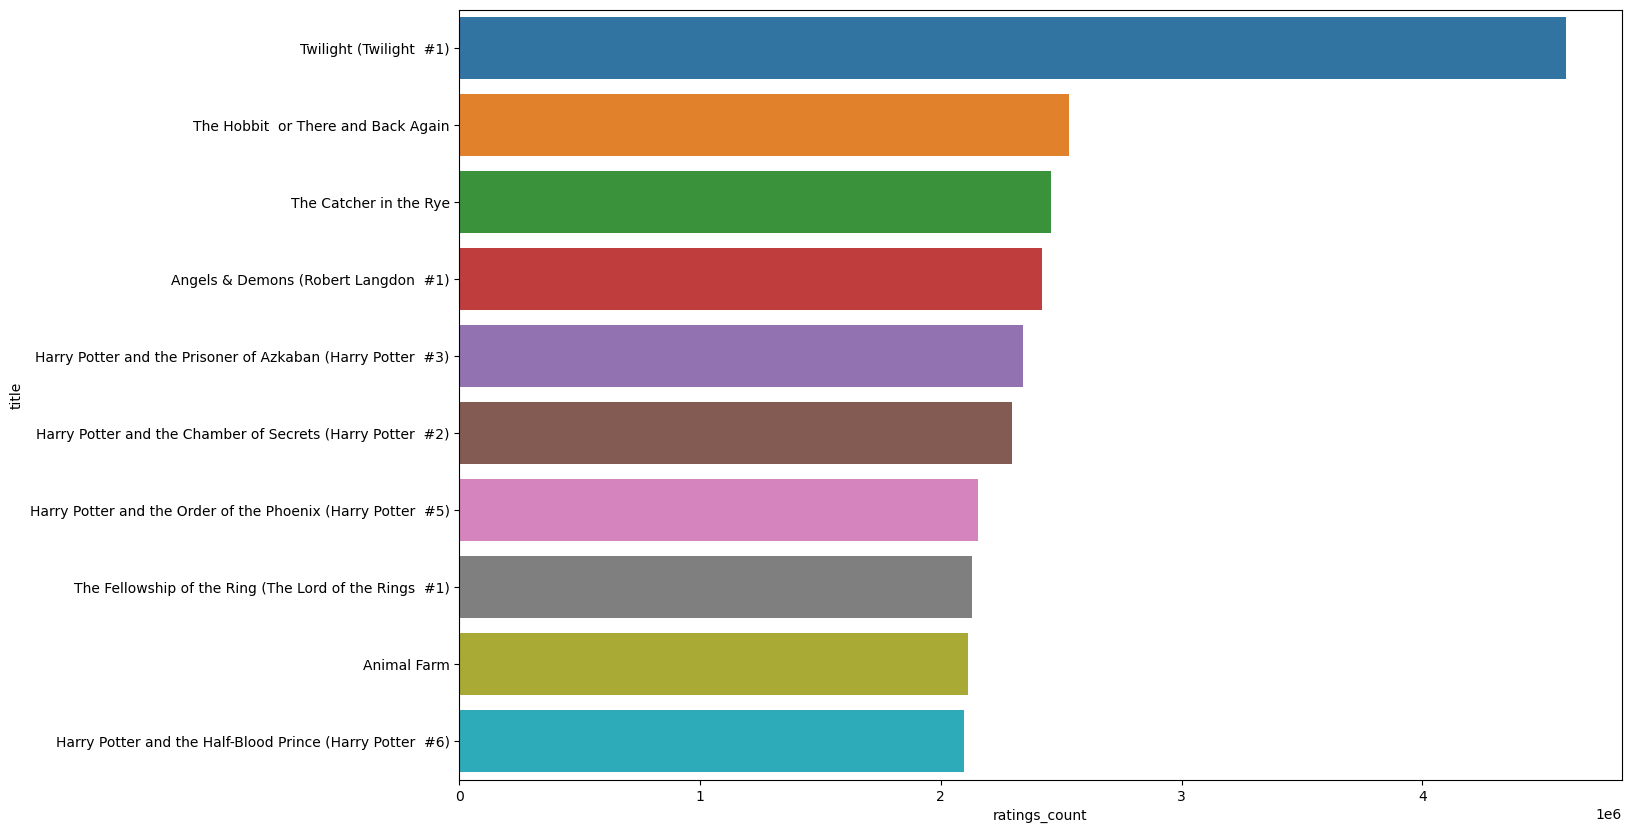

In [13]:
#plotting most rated books
most_rated = books.sort_values("ratings_count", ascending = False).head(10).set_index("title")
plt.figure(figsize=(15,10))
sns.barplot(x=most_rated["ratings_count"], y=most_rated.index)


<Axes: xlabel='average_rating', ylabel='title'>

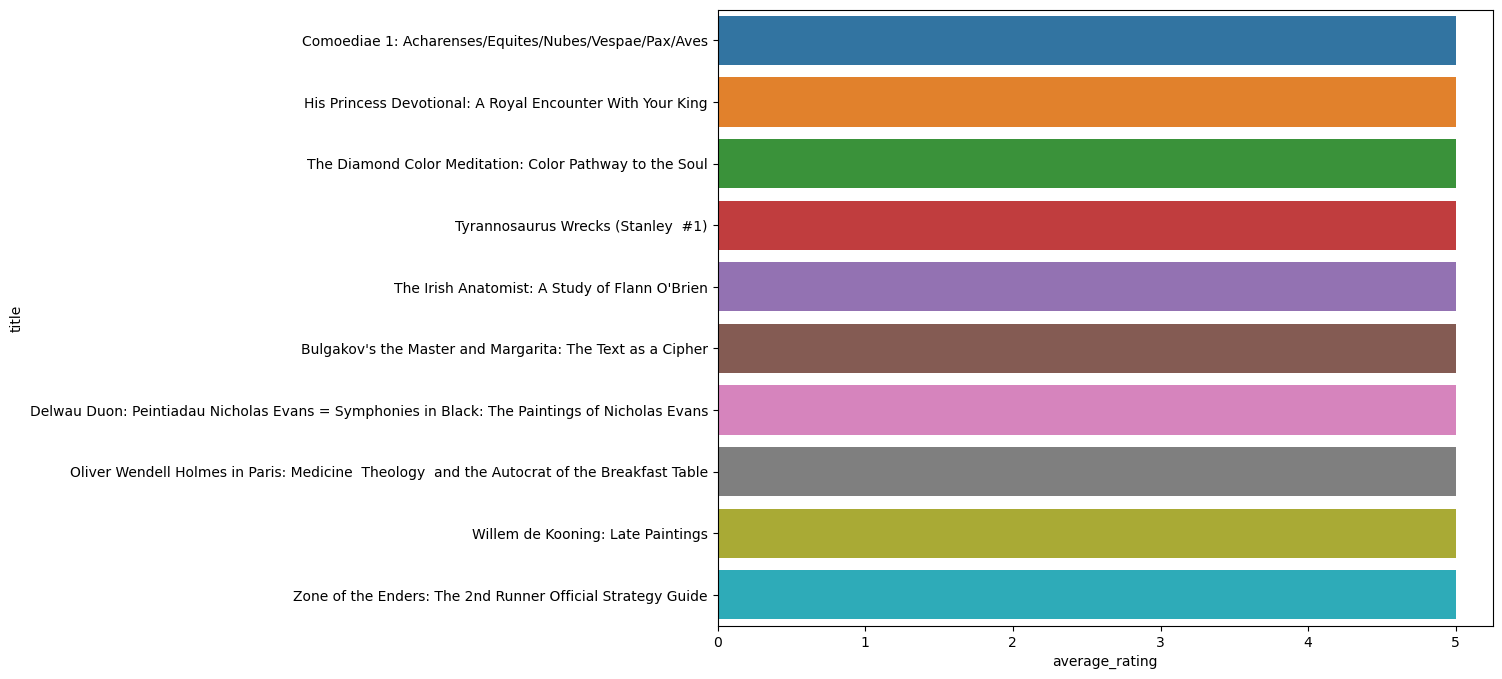

In [14]:
#top ten books based on average rating 
avg_rating = books.sort_values("average_rating", ascending = False).head(10)
plt.figure(figsize=(10,8))
sns.barplot(x=avg_rating["average_rating"], y=avg_rating["title"])



Text(0.5, 1.0, 'Top 10 highly rated authors')

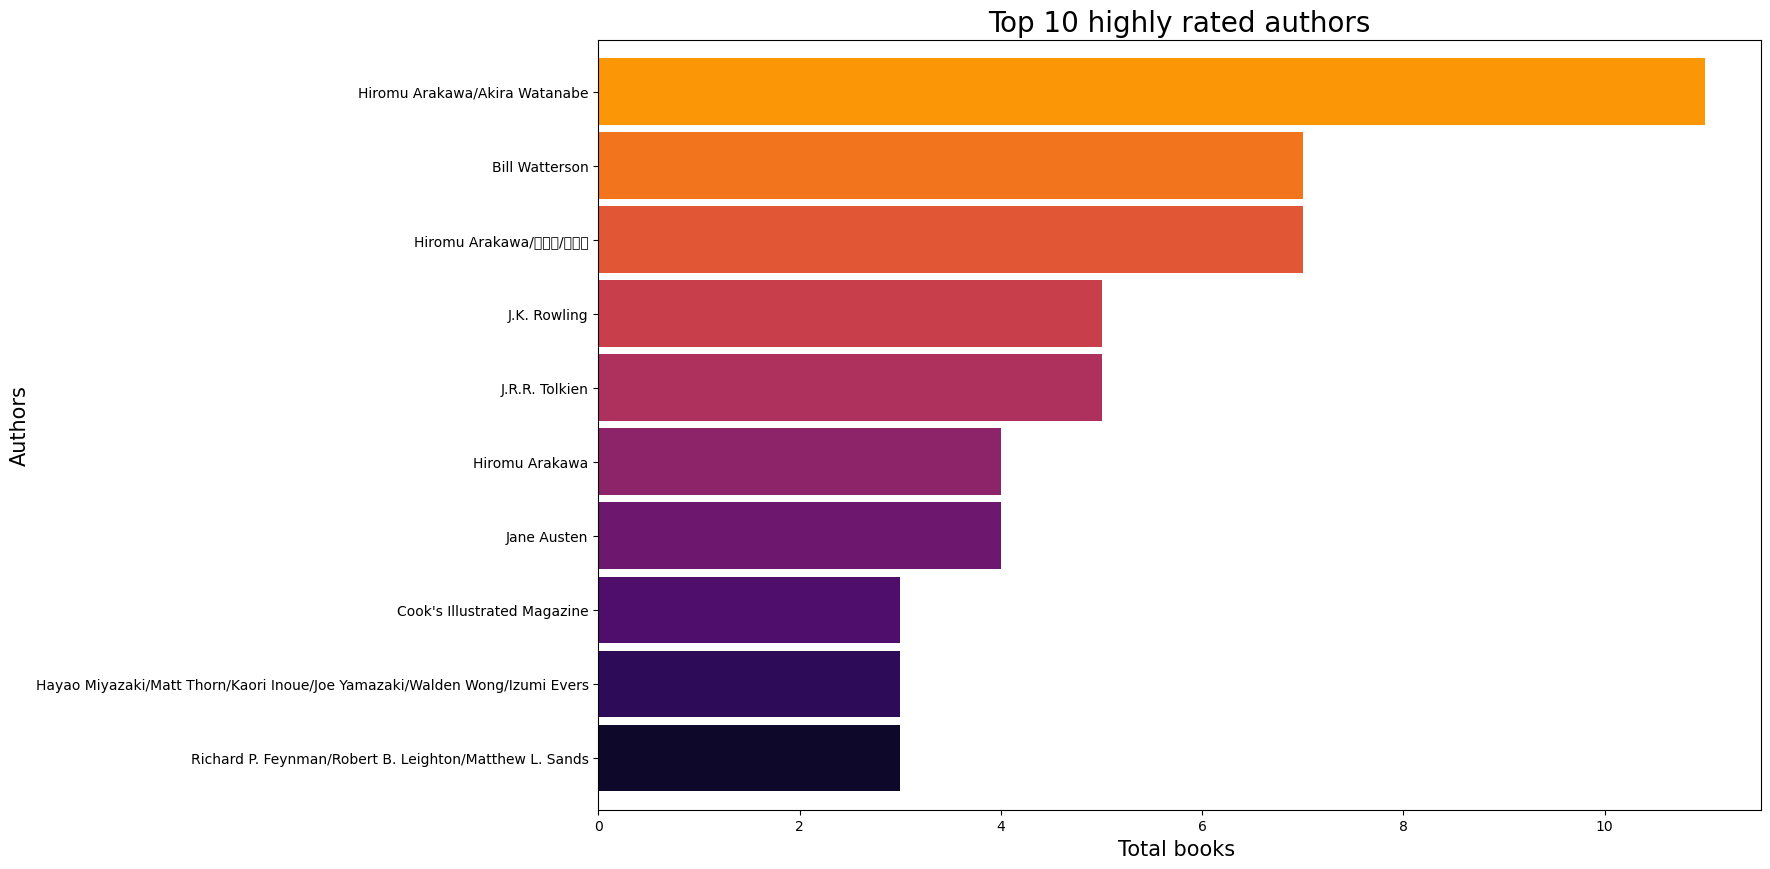

In [15]:
#top 10 publisher by number of book published
high_rated_author = books[books["average_rating"]>4.5]
high_rated_author = high_rated_author.groupby('authors')['title'].count().reset_index().sort_values('title',ascending=False).head(10).set_index('authors')
plt.subplots(figsize=(15,10))
ax = high_rated_author['title'].sort_values().plot.barh(width=0.9,color=sns.color_palette('inferno',12))
ax.set_xlabel("Total books ", fontsize=15)
ax.set_ylabel("Authors", fontsize=15)
ax.set_title("Top 10 highly rated authors",fontsize=20,color='black')

Text(0, 0.5, 'Publishers')

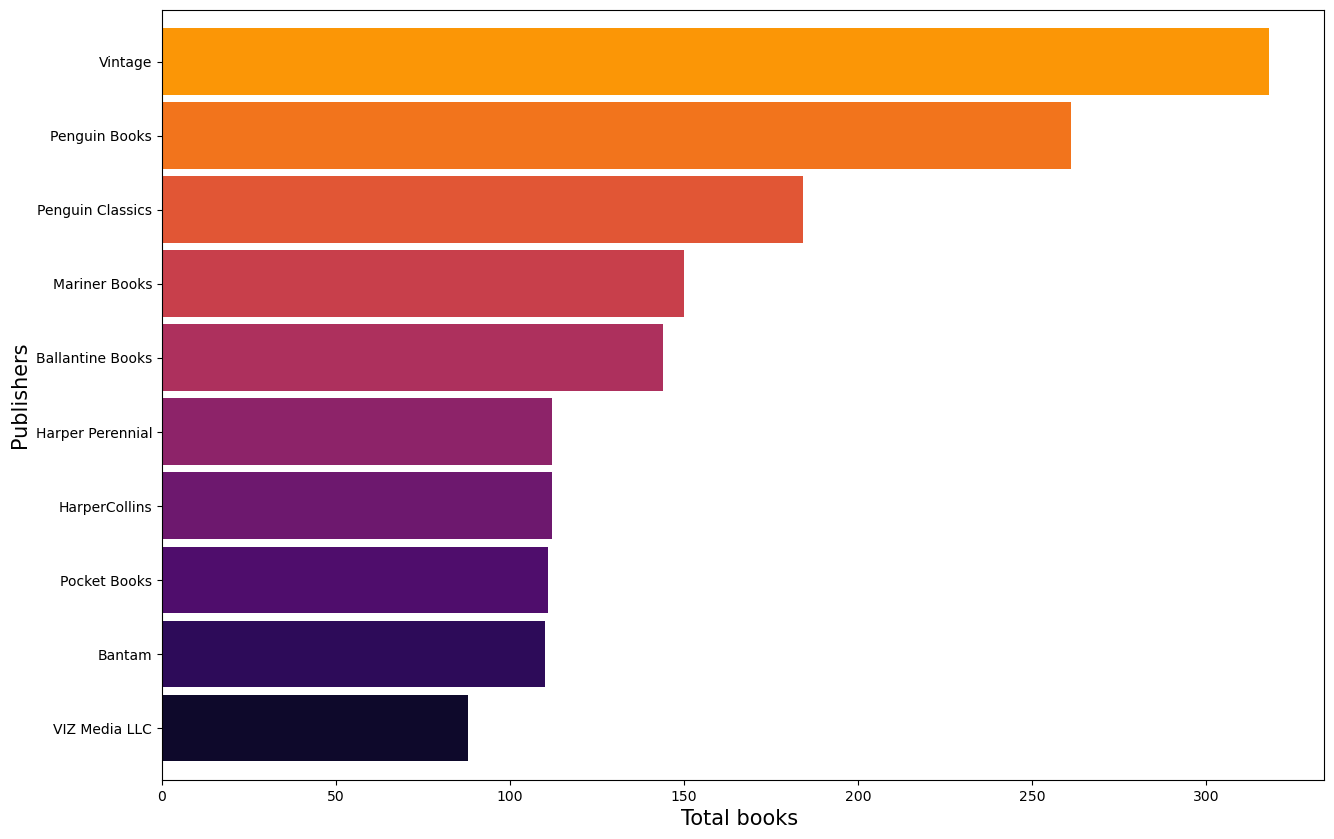

In [16]:
#top 10 highly rated publisher
top_publishers = books.groupby('publisher')['title'].count().reset_index().sort_values('title',ascending=False).head(10).set_index('publisher')
plt.subplots(figsize=(15,10))
ax = top_publishers['title'].sort_values().plot.barh(width=0.9,color=sns.color_palette('inferno',12))
ax.set_xlabel("Total books ", fontsize=15)
ax.set_ylabel("Publishers", fontsize=15)

<Axes: xlabel='average_rating', ylabel='Density'>

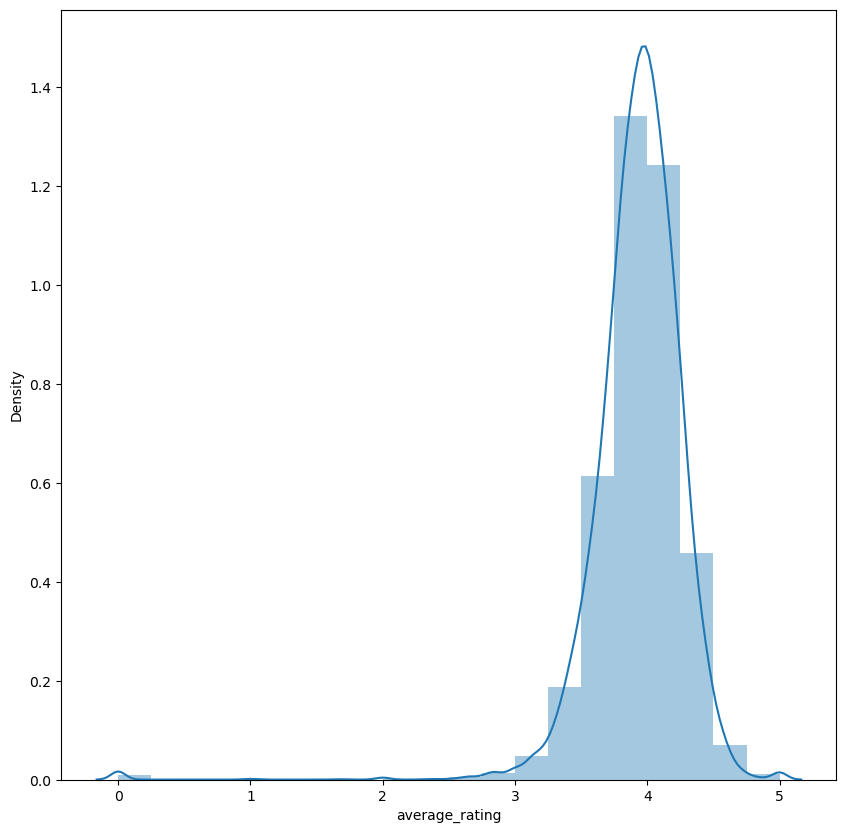

In [17]:
#average  rating distribution
plt.figure(figsize=(10,10))
rating = books.average_rating.astype(float)
sns.distplot(rating, bins =20)

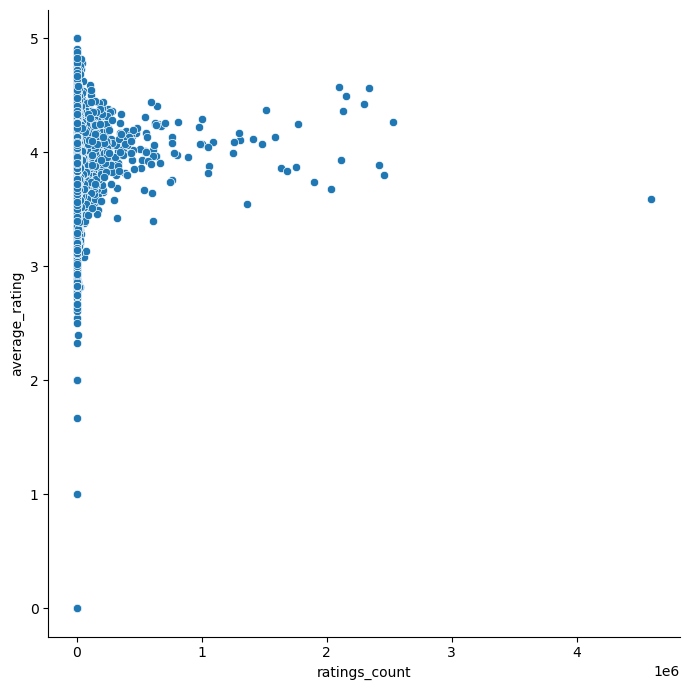

In [18]:
#Relationship between average rating and most rated 
ax = sns.relplot(data=books, x="ratings_count", y="average_rating", sizes=(100, 200), height=7, marker='o')

<Figure size 1500x1000 with 0 Axes>

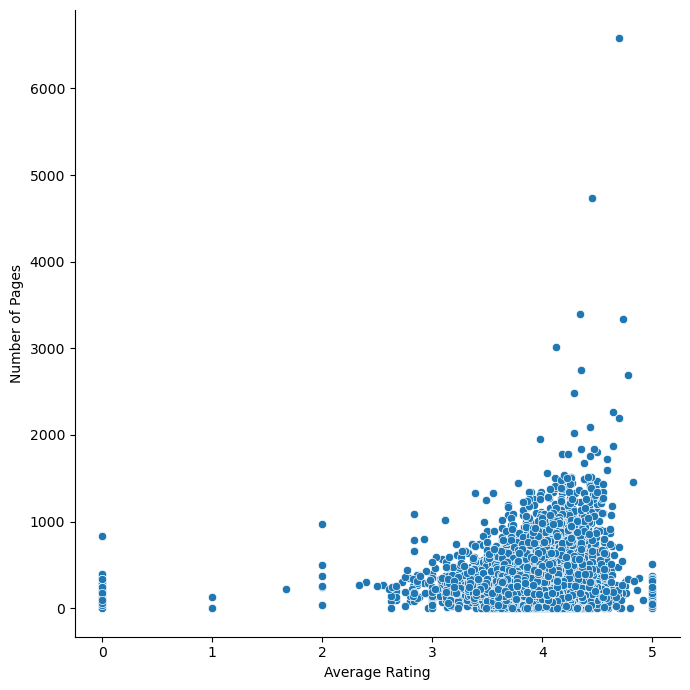

In [19]:
#Relationship between average rating and number of page
plt.figure(figsize=(15,10))
ax = sns.relplot(data=books, x="average_rating", y="  num_pages", sizes=(100, 200), height=7, marker='o')
ax.set_axis_labels("Average Rating", "Number of Pages")

### there is a double space before the column name "  num_pages". We need to remove it

In [20]:
#removing spacing in column name if there is any beside "num_pages"
books.columns = books.columns.str.replace(' ','')
books["num_pages"]

0         652
1         870
2         352
3         435
4        2690
         ... 
11118     512
11119     635
11120     415
11121     434
11122     272
Name: num_pages, Length: 11123, dtype: int64

In [21]:
#dropping bookID since its of no use
books.drop(["bookID","isbn","isbn13"], axis=1, inplace = True)

In [22]:
books.head(2)

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,9/1/2004,Scholastic Inc.


In [23]:
duplicated = books[books.duplicated()]
duplicated
#there is duplicate

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher


In [24]:
#checking books with largest page number to see if it is outlier or not
books.nlargest(5,"num_pages")

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
6497,The Complete Aubrey/Maturin Novels (5 Volumes),Patrick O'Brian,4.70,eng,6576,1338,81,10/17/2004,W. W. Norton Company
6802,The Second World War,Winston S. Churchill/John Keegan,4.45,eng,4736,1493,99,5/9/1986,Mariner Books
10906,Remembrance of Things Past (Boxed Set),Marcel Proust/C.K. Scott Moncrieff/Frederick A...,4.34,eng,3400,6,1,3/5/1981,Chatto & Windus
6,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,eng,3342,28242,808,9/12/2005,Scholastic
6822,Summa Theologica 5 Vols,Thomas Aquinas,4.12,eng,3020,2734,84,1/1/1981,Christian Classics


#### Tilte of the books comprimises of multiple volume, therefore the maximum observation are valid

In [25]:
len(books[books["num_pages"]== 0])

76

In [26]:
books = books[books["num_pages"]!= 0]

In [27]:
len(books[books["num_pages"]== 0])

0

### Since the average rating starts from 1 and it can never be zero unless there is no rating for the book. Lets explore the data with average rating zero

In [28]:
books[(books['average_rating']==0)]

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
265,Out to Eat London 2002 (Lonely Planet Out to Eat),Lonely Planet/Mark Honan,0.0,eng,295,0,0,9/1/2001,Lonely Planet
375,Juiced Official Strategy Guide,Doug Walsh,0.0,eng,112,0,0,6/1/2005,BradyGames
987,Open City 6: The Only Woman He Ever Left,Open City Magazine/James Purdy/Daniel Pinchbec...,0.0,eng,200,0,0,10/13/2000,Grove Press Open City Books
2532,How To Meditate: An Anthology Of Talks On Medi...,Frederick P. Lenz,0.0,eng,228,0,0,1/1/2004,Frederick P. Lenz Foundation for American Budd...
2533,Insights: Talks On The Nature Of Existence,Frederick P. Lenz,0.0,eng,304,0,0,1/1/2003,Frederick P. Lenz Foundation for American Budd...
2758,Venac sonetnih venaca; Puževa srma,Dobrica Erić,0.0,srp,222,0,0,1/1/1996,"Izdavačka agencija ""Draganić"""
3492,Brodie's notes on Aldous Huxley's brave new world,Graham Handley,0.0,eng,71,0,0,8/20/1992,Macmillan
4241,American Film Guide,Frank N. Magill,0.0,eng,5,0,0,1/1/1983,Salem Press Inc
4677,The Man and the Author: John Milton: Twentieth...,J. Martin Evans,0.0,eng,386,0,0,11/8/2002,Routledge
5323,Canopy: A Work for Voice and Light in Harvard ...,David Ward/Parveen Adams/Seamus Heaney/Ivan ...,0.0,eng,63,0,0,12/31/1997,Arts Publications


### the data is valid since book with average rating zero does not have any ratings. 


In [29]:
#making copy of the data just in case i mess something 
goodread = books.copy()

## Creating new column and dividing the average rating into diffrent catagory 

In [30]:
goodread.loc[ (goodread['average_rating'] >= 0) & (goodread['average_rating'] <= 1), 'rating_between'] = "between 0 and 1"
goodread.loc[ (goodread['average_rating'] > 1) & (goodread['average_rating'] <= 2), 'rating_between'] = "between 1 and 2"
goodread.loc[ (goodread['average_rating'] > 2) & (goodread['average_rating'] <= 3), 'rating_between'] = "between 2 and 3"
goodread.loc[ (goodread['average_rating'] > 3) & (goodread['average_rating'] <= 4), 'rating_between'] = "between 3 and 4"
goodread.loc[ (goodread['average_rating'] > 4) & (goodread['average_rating'] <= 5), 'rating_between'] = "between 4 and 5"

In [31]:
goodread.head(3)

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,rating_between
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,between 4 and 5
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,between 4 and 5
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,11/1/2003,Scholastic,between 4 and 5


In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Feature engineering
# Create a TF-IDF vectorizer object to convert text data into numerical vectors
vectorizer = TfidfVectorizer(stop_words="english")



In [33]:
# Fit the vectorizer to the book titles and authors
title_author_matrix = vectorizer.fit_transform(goodread["title"] + " " + goodread["authors"])


In [34]:
from sklearn.neighbors import NearestNeighbors
# Train the KNN model on the TF-IDF matrix
knn = NearestNeighbors(metric="cosine", algorithm="brute")
knn.fit(title_author_matrix)


NearestNeighbors(algorithm='brute', metric='cosine')

In [35]:
# Define a function to get book recommendations based on a given book title
def get_recommendations(title, knn_model=knn, books=books, vectorizer=vectorizer):
    # Get the index of the book that matches the title
    idx = goodread.index[goodread["title"] == title].tolist()[0]
    
    # Convert the title and author into a numerical vector using the vectorizer
    title_author_vec = vectorizer.transform([title + " " + goodread.loc[idx, "authors"]])
    
    # Find the indices of the k nearest neighbors
    _, indices = knn_model.kneighbors(title_author_vec, n_neighbors=11)
    
    # Get the book titles and authors of the k nearest neighbors
    recommendations = goodread.iloc[indices[0][1:]][["title", "authors"]]
    
    return recommendations

In [36]:
# Testing the function by getting recommendations for a book title
get_recommendations("Insights: Talks On The Nature Of Existence")

,title,authors
2532,How To Meditate: An Anthology Of Talks On Medi...,Frederick P. Lenz
3615,The Celestine Prophecy: A Pocket Guide to the ...,James Redfield
9289,Autobiographies: Narrative of the Life of Fred...,Frederick Douglass/Henry Louis Gates Jr.
9288,Narrative of the Life of Frederick Douglass: A...,Frederick Douglass
47,The Control of Nature,John McPhee
3599,Nature Girl,Carl Hiaasen
10966,Landscape Within: Insights and Inspirations fo...,David Ward/Joe Cornish
9286,Narrative of the Life of Frederick Douglass: A...,Frederick Douglass/David W. Blight
9287,Narrative of the Life of Frederick Douglass: A...,Frederick Douglass/Gregory Stephens/Peter J. G...
5525,The Nature of the Child,Jerome Kagan


In [37]:
get_recommendations("Harry Potter and the Prisoner of Azkaban (Harry Potter  #3)")

,title,authors
1233,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling
4415,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling/Mary GrandPré
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré
8873,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling/Mary GrandPré
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré
6,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling
10675,Harry Potter and the Goblet of Fire (Harry Pot...,J.K. Rowling
10674,Harry Potter and the Philosopher's Stone (Harr...,J.K. Rowling
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling


In [38]:
get_recommendations("The Lord of the Rings (The Lord of the Rings  #1-3)")

,title,authors
1695,The Lord of the Rings (The Lord of the Rings ...,J.R.R. Tolkien
24,The Lord of the Rings (The Lord of the Rings ...,J.R.R. Tolkien/Alan Lee
724,The Lord of the Rings- 3 volumes set (The Lord...,J.R.R. Tolkien
2042,The Lord of the Rings (The Lord of the Rings ...,J.R.R. Tolkien/Rob Inglis
4283,The Lord of the Rings Millennium Edition Boxed...,J.R.R. Tolkien
4272,The Lord of the Rings / The Hobbit,J.R.R. Tolkien
4277,The Return of the King (The Lord of the Rings ...,J.R.R. Tolkien
4263,The Return of the King (The Lord of the Rings ...,J.R.R. Tolkien
4255,The Return of the King (The Lord of the Rings ...,J.R.R. Tolkien
23,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. Tolkien
